In [1]:
#Imports
import sys
sys.path.append('../python/')
import NGC5533_functions as nf

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import lmfit as lm
import dataPython as dp

from datetime import datetime
import time as t

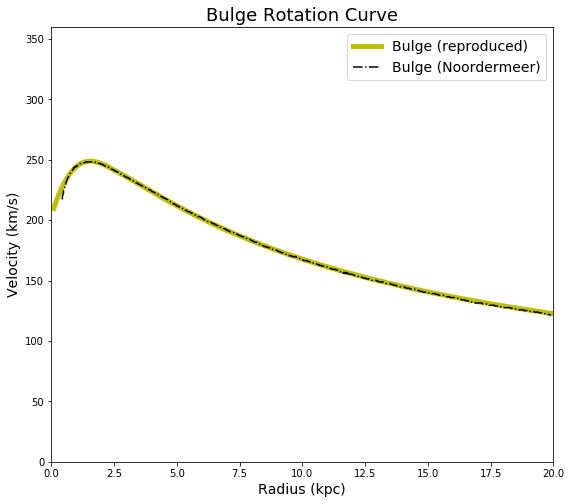

In [2]:
#bulge

data_bulge_nord = dp.getXYdata('data/NGC5533-bulge_fmt.txt')
#Bulge (Noordermeer's)
#convert to numpy arrays
r_b_nord = np.asarray(data_bulge_nord['xx'])
v_b_nord = np.asarray(data_bulge_nord['yy'])

#Plot 
fig = plt.figure(figsize=(9.0,8.0))

ax = plt.axes()
ax.set_title('Bulge Rotation Curve', fontsize=18)              #labeling axes
ax.set_xlabel('Radius (kpc)', fontsize=14)
ax.set_ylabel('Velocity (km/s)', fontsize=14)
#ax.grid(True)
plt.xlim(0,20)
plt.ylim(0,360)
rval = np.arange(0.1,200,0.1)

plt.plot(rval,nf.b_v(rval,load=True),color='y',label='Bulge (reproduced)',linewidth=5)
plt.plot(r_b_nord, v_b_nord, color='k', linestyle='-.', label='Bulge (Noordermeer)') 
plt.legend(fontsize=14)
#plt.show()
plt.savefig('Reproducibility_Paper_Figures/bulge_comparison.png')

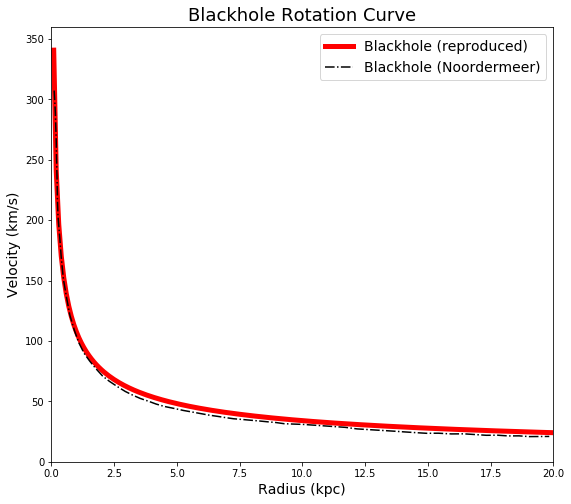

In [3]:
#blackhole

data_bh_nord = dp.getXYdata('data/NGC5533-blackhole_fmt.txt')

#Black hole (Noordermeer's)
#convert to arrays
r_bh_nord = np.asarray(data_bh_nord['xx'])
v_bh_nord = np.asarray(data_bh_nord['yy'])



#Plot 
fig = plt.figure(figsize=(9.0,8.0))

ax = plt.axes()
ax.set_title('Blackhole Rotation Curve', fontsize=18)              #labeling axes
ax.set_xlabel('Radius (kpc)', fontsize=14)
ax.set_ylabel('Velocity (km/s)', fontsize=14)
#ax.grid(True)
plt.xlim(0,20)
plt.ylim(0,360)
rval = np.arange(0.1,200,0.1)

plt.plot(rval,nf.bh_v(rval,load=True),color='r',label='Blackhole (reproduced)',linewidth=5)
plt.plot(r_bh_nord, v_bh_nord, color='k', linestyle='-.', label='Blackhole (Noordermeer)') 
plt.legend(fontsize=14)
#plt.show()
plt.savefig('Reproducibility_Paper_Figures/bh_comparison.png')

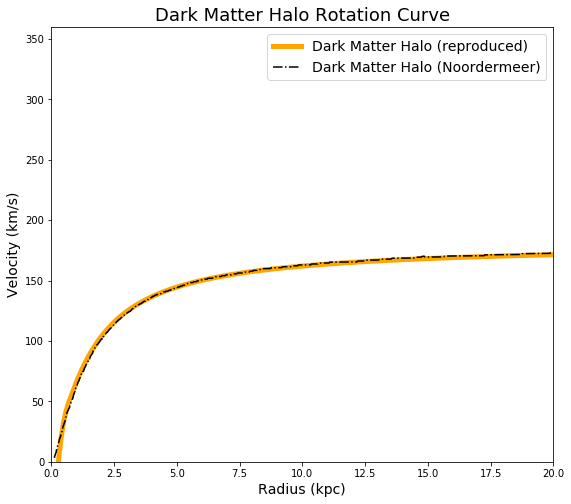

In [4]:
#halo

data_dm_nord = dp.getXYdata('data/NGC5533-dm_fmt.txt')

#Dark Matter Halo (Noordermeer's)
#convert to  arrays
r_dm_nord = np.asarray(data_dm_nord['xx'])
v_dm_nord = np.asarray(data_dm_nord['yy'])



#Plot 
fig = plt.figure(figsize=(9.0,8.0))

ax = plt.axes()
ax.set_title('Dark Matter Halo Rotation Curve', fontsize=18)              #labeling axes
ax.set_xlabel('Radius (kpc)', fontsize=14)
ax.set_ylabel('Velocity (km/s)', fontsize=14)
#ax.grid(True)
plt.xlim(0,20)
plt.ylim(0,360)
rval = np.arange(0.1,200,0.1)

plt.plot(rval,nf.h_v(rval,load=True),color='orange',label='Dark Matter Halo (reproduced)',linewidth=5)
plt.plot(r_dm_nord, v_dm_nord, color='k', linestyle='-.', label='Dark Matter Halo (Noordermeer)') 
plt.legend(fontsize=14)
#plt.show()
plt.savefig('Reproducibility_Paper_Figures/halo_comparison.png')

In [76]:
#disk (new 100kpc data)
data_disk_nord = dp.getXYdata('data/noord_disk_100kpc')



#Disk (Noordermeer's)
#convert to numpy arrays
r_d_nord = np.asarray(data_disk_nord['xx'])
v_d_nord = np.asarray(data_disk_nord['yy'])

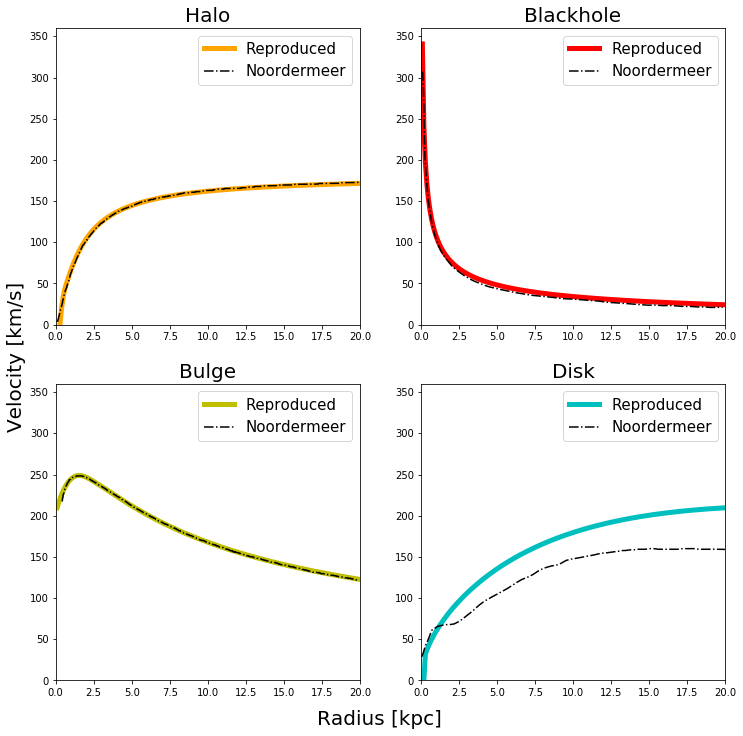

In [81]:
#x = np.linspace(0,10,100)
#y = 3*x
fig, axs = plt.subplots(2,2,figsize=(12,12))
#fig, axs = plt.subplots(2, 2)

ax1 = axs[0, 0]
ax1.plot(rval,nf.h_v(rval,load=True),color='orange',label='Reproduced',linewidth=5)
ax1.plot(r_dm_nord, v_dm_nord, color='k', linestyle='-.', label='Noordermeer') 
ax1.legend(loc="upper right", prop={'size': 15})
ax1.set_title('Halo', size=20)

ax2 = axs[0, 1]
ax2.plot(rval,nf.bh_v(rval,load=True),color='r',label='Reproduced',linewidth=5)
ax2.plot(r_bh_nord, v_bh_nord, color='k', linestyle='-.', label='Noordermeer') 
ax2.legend(loc="upper right", prop={'size': 15})
ax2.set_title('Blackhole', size=20)

ax3 = axs[1,0]
ax3.plot(rval,nf.b_v(rval,load=True),color='y',label='Reproduced',linewidth=5)
ax3.plot(r_b_nord, v_b_nord, color='k', linestyle='-.', label='Noordermeer') 
ax3.legend(loc="upper right", prop={'size': 15})
ax3.set_title('Bulge', size=20)

ax4 = axs[1,1]
ax4.plot(rval,nf.d_v(rval,load=True),color='c',label='Reproduced',linewidth=5)
ax4.plot(r_d_nord, v_d_nord, color='k', linestyle='-.', label='Noordermeer') 
ax4.legend(loc="upper right", prop={'size': 15})
ax4.set_title('Disk', size=20)


#xs[0, 0].plot
#axs[0, 0].set_title('Axis [0,0]')
#axs[0, 1].plot(x, y, 'tab:orange')
#axs[0, 1].set_title('Axis [0,1]')
#axs[1, 0].plot(x, -y, 'tab:green')
#axs[1, 0].set_title('Axis [1,0]')
#axs[1, 1].plot(x, -y, 'tab:red')
#axs[1, 1].set_title('Axis [1,1]')

fig.text(0.5, 0.08, 'Radius [kpc]', ha='center', va='center',fontsize=20)
fig.text(0.08, 0.5, 'Velocity [km/s]', ha='center', va='center', rotation='vertical',fontsize=20)
for ax in axs.flat:  #for loop for easier organization; helpful if many supblots
    #ax1.set(xlabel='x-dfdf', ylabel='y-dfdsf')
   # ax.set(xlabel='radius [kpc]', ylabel='Velocity [km/s]')
    ax.set_xlim([0, 20])
    ax.set_ylim([0, 360])

# Hide x labels and tick labels for top plots and y ticks for right plots.

plt.savefig('Reproducibility_Paper_Figures/4component_comparison.png')